# Chocolate Data Sales

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Problem Statement

Analisis Profitabilitas Produk

1. Menganalisis produk paling menguntungkan  
2. Menganalisis produk paling tidak menguntungkan

Analisis Penjualan Berdasarkan Negara

1. Total penjualan per negara
2. Produk terlaris per negara

Tren Penjualan dari Waktu ke Waktu

1. Menganalisis total penjualan per bulan  
2. Menganalisis total penjualan per hari

Analisis Kinerja Penjual

1. Menganalisis penjual terbaik  
2. Menganalisis penjual terburuk

## Data Understanding

In [2]:
df = pd.read_csv("Chocolate Sales.csv")
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [3]:
# Ukuran dataset
rows, cols = df.shape

print("=== Informasi Ukuran Dataset ===\n")
print(f"Dataset terdiri dari {rows} baris dan {cols} kolom.\n")

=== Informasi Ukuran Dataset ===

Dataset terdiri dari 1094 baris dan 6 kolom.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [5]:
df.describe()

,Boxes Shipped
count,1094.000000
mean,161.797989
std,121.544145
min,1.000000
25%,70.000000
50%,135.000000
75%,228.750000
max,709.000000


### A. Deskripsi Kolom

| Nama Kolom           | Deskripsi                                                  |
| -------------------- | -----------------------------------------------------------|
| `Sales Person`       | Nama tenaga penjual yang bertanggung jawab atas transaksi  |
| `Country`            | Negara tempat transaksi penjualan dilakukan                |
| `Product`            | Nama produk cokelat yang dijual                            |
| `Date`               | Tanggal terjadinya transaksi penjualan                     |
| `Amount`             | Nilai total penjualan dalam satuan mata uang               |
| `Boxes Shipped`      | Jumlah kotak produk yang dikirim dalam transaksi tersebut  |

### B. Missing Value

In [6]:
missing = df.isna().sum()
total_missing = missing.sum()
missing_values = df.isna().sum().sum()/len(df)*100

print("=== Missing Values Summary ===\n")

if total_missing > 0:
    for col, val in missing.items():
        if val > 0:
            print(f"Terdapat missing values pada kolom {col} sebesar {val} nilai atau sebesar {missing_values:.2f}%")
else:
    print("✅ Tidak ada missing values di dataset.")

=== Missing Values Summary ===

✅ Tidak ada missing values di dataset.


### C. Duplicated Data

In [7]:
duplicate_rows = df[df.duplicated()]
num_duplicates = duplicate_rows.shape[0]

print("=== Duplicate Rows Summary ===\n")

if num_duplicates > 0:
    print("Berikut beberapa contoh duplikat:")
    display(duplicate_rows.head())
else:
    print("✅ Tidak ada baris duplikat yang ditemukan di dataset.")

=== Duplicate Rows Summary ===

✅ Tidak ada baris duplikat yang ditemukan di dataset.


### D. Unique Value for Each Columns

In [8]:
for col in df.columns:
    uniques = df[col].unique()
    print(f"{col}: {len(uniques)} unique values")
    print(uniques)
    print()

Sales Person: 25 unique values
['Jehu Rudeforth' 'Van Tuxwell' 'Gigi Bohling' 'Jan Morforth' 'Oby Sorrel'
 'Gunar Cockshoot' 'Brien Boise' 'Rafaelita Blaksland' 'Barr Faughny'
 'Mallorie Waber' 'Karlen McCaffrey' "Marney O'Breen" 'Beverie Moffet'
 'Roddy Speechley' 'Curtice Advani' 'Husein Augar' 'Kaine Padly'
 'Dennison Crosswaite' "Wilone O'Kielt" 'Andria Kimpton' 'Kelci Walkden'
 'Camilla Castle' 'Madelene Upcott' 'Dotty Strutley' 'Ches Bonnell']

Country: 6 unique values
['UK' 'India' 'Australia' 'New Zealand' 'USA' 'Canada']

Product: 22 unique values
['Mint Chip Choco' '85% Dark Bars' 'Peanut Butter Cubes'
 'Smooth Sliky Salty' '99% Dark & Pure' 'After Nines' '50% Dark Bites'
 'Orange Choco' 'Eclairs' 'Drinking Coco' 'Organic Choco Syrup'
 'Milk Bars' 'Spicy Special Slims' 'Fruit & Nut Bars' 'White Choc'
 'Manuka Honey Choco' 'Almond Choco' 'Raspberry Choco'
 'Choco Coated Almonds' "Baker's Choco Chips" 'Caramel Stuffed Bars'
 '70% Dark Bites']

Date: 168 unique values
['04-Jan-2

## Data Cleaning

### A. Convert data type

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

In [10]:
df['Amount'] = df['Amount'].str.replace('[$,]', '', regex=True).astype(float)

### B. Feature Engineering

In [11]:
df['Month_Name'] = df['Date'].dt.strftime('%B')
df['Day_Name'] = df['Date'].dt.day_name()

print("Unique Month Names:")
print(sorted(df['Month_Name'].unique()))

print("\nUnique Day Names:")
print(sorted(df['Day_Name'].unique()))

Unique Month Names:
['April', 'August', 'February', 'January', 'July', 'June', 'March', 'May']

Unique Day Names:
['Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday']


## Exploratory Data Analysis

### A. Analisis Profitabilitas Produk

#### a. Produk Paling Menguntungkan

In [12]:
top_product = df.groupby("Product")["Amount"].sum().sort_values(ascending=False).reset_index().head(10)
top_product

,Product,Amount
0,Smooth Sliky Salty,349692.0
1,50% Dark Bites,341712.0
2,White Choc,329147.0
3,Peanut Butter Cubes,324842.0
4,Eclairs,312445.0
5,99% Dark & Pure,299796.0
6,85% Dark Bars,299229.0
7,Organic Choco Syrup,294700.0
8,Spicy Special Slims,293454.0
9,Mint Chip Choco,283969.0


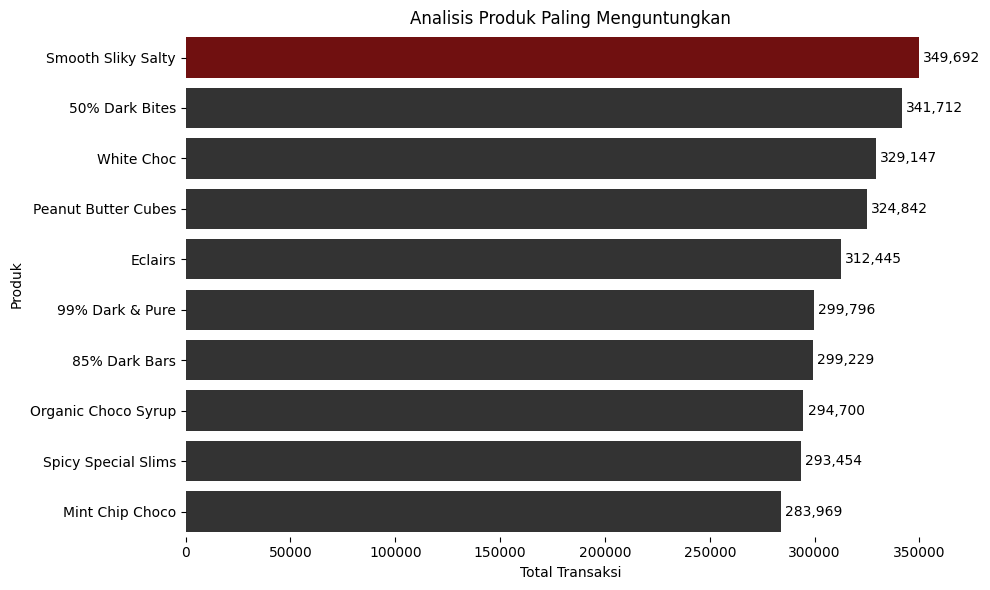

In [13]:
# Buat plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=top_product.head(10),
    y='Product',
    x='Amount',
    palette=['#800000'] + ['#333333'] * 9,
    ax=ax
)

# Tambahkan label
for i, value in enumerate(top_product['Amount'].head(10)):
    ax.text(value + 2000, i, f'{int(value):,}', va='center')

# Hapus semua border
for spine in ax.spines.values():
    spine.set_visible(False)

# Tambahkan judul dan label
ax.set_title('Analisis Produk Paling Menguntungkan')
ax.set_xlabel('Total Transaksi')
ax.set_ylabel('Produk')

plt.tight_layout()
plt.show()

##### Insight dan Rekomendasi

Insight:

1. **Dominasi Produk Dark & Rich Flavors**
   - Produk seperti **50% Dark Bites**, **99% Dark & Pure**, **85% Dark Bars**, dan **Mint Chip Choco** menunjukkan performa sangat kuat.
   - Menandakan bahwa konsumen memiliki preferensi tinggi terhadap rasa dark chocolate.

2. **Tingginya Minat terhadap Produk dengan Cita Rasa Unik dan Premium**
   - Produk seperti **Smooth Silky Salty**, **White Choc**, dan **Peanut Butter Cubes** disukai karena kombinasi rasa inovatif dan berkelas.
   - Rasa asin-manis dan creamy menjadi daya tarik tersendiri.

3. **Permintaan Tinggi terhadap Produk Fungsional dan Serbaguna**
   - Produk seperti **Organic Choco Syrup** dan **Spicy Special Slims** diminati karena fleksibilitas penggunaannya sebagai topping, campuran, atau snack.

Rekomendasi:

- **Fokus Promosi pada Produk Dark Chocolate**
  - Buat kampanye bertema *"Dark Series"* atau *"Bold Chocolate"* untuk meningkatkan visibilitas produk dark chocolate.
  - Soroti keunggulan kesehatan dan rasa khas dark chocolate dalam materi promosi.

- **Kembangkan Varian Baru dari Produk Best Seller**
  - Inovasikan varian baru dari **Smooth Silky Salty** dan **Peanut Butter Cubes**, seperti versi mini, high-protein, atau rasa kombinasi baru.
  - Uji coba edisi terbatas (*limited edition*) untuk menarik perhatian konsumen loyal.

- **Perkuat Distribusi di Channel Strategis**
  - Pastikan produk-produk unggulan tersedia di area dengan permintaan tinggi (misal: Australia, UK, India).
  - Optimalkan display dan restocking di kanal modern trade dan e-commerce.

- **Dorong Cross-Selling dan Strategi Bundling**
  - Tawarkan bundling antar produk best seller seperti *50% Dark Bites + Organic Choco Syrup*.
  - Gunakan strategi upselling saat konsumen membeli produk sejenis.

#### b. Produk Paling Tidak Menguntungkan

In [14]:
bot_product = df.groupby("Product")["Amount"].sum().sort_values(ascending=True).reset_index().head(10)
bot_product

,Product,Amount
0,70% Dark Bites,211610.0
1,Caramel Stuffed Bars,231588.0
2,Choco Coated Almonds,241486.0
3,Baker's Choco Chips,249613.0
4,Orange Choco,256144.0
5,Drinking Coco,256655.0
6,Fruit & Nut Bars,259147.0
7,After Nines,261331.0
8,Raspberry Choco,264740.0
9,Milk Bars,269248.0


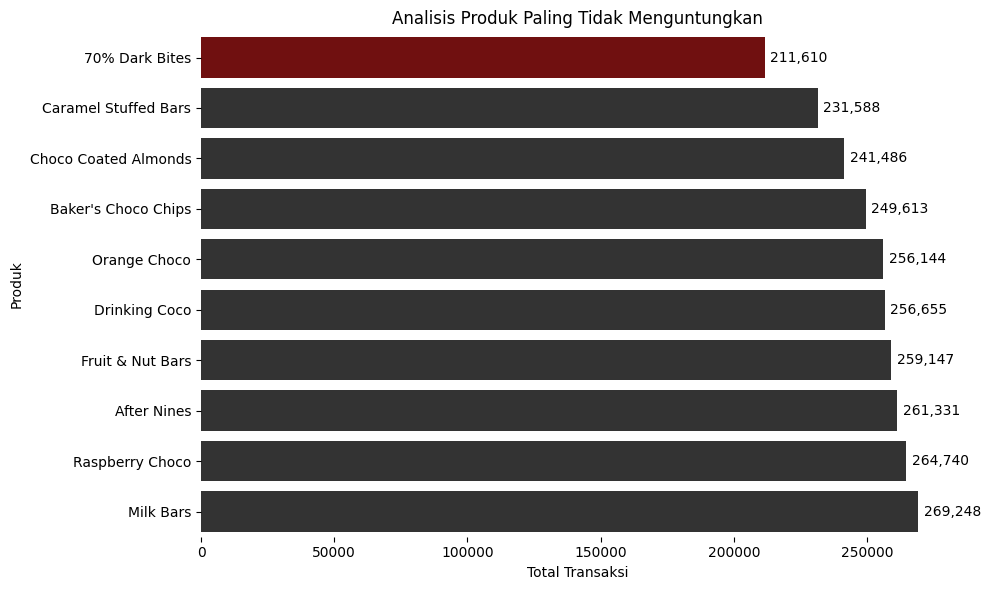

In [15]:
# Buat plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=bot_product.head(10),
    y='Product',
    x='Amount',
    palette=['#800000'] + ['#333333'] * 9,
    ax=ax
)

# Tambahkan label
for i, value in enumerate(bot_product['Amount'].head(10)):
    ax.text(value + 2000, i, f'{int(value):,}', va='center')

# Hapus semua border
for spine in ax.spines.values():
    spine.set_visible(False)

# Tambahkan judul dan label
ax.set_title('Analisis Produk Paling Tidak Menguntungkan')
ax.set_xlabel('Total Transaksi')
ax.set_ylabel('Produk')

plt.tight_layout()
plt.show()

##### Insight dan Rekomendasi

Insight:

1. **Produk Masih dalam Segmen Cokelat Umum namun Kurang Daya Saing**
   - Produk seperti **Milk Bars**, **Orange Choco**, dan **Fruit & Nut Bars** berada di kategori rasa umum yang mungkin terlalu banyak pesaing atau kurang diferensiasi.
   - Konsumen tampaknya lebih memilih rasa yang unik, intens, atau premium dibanding rasa standar.

2. **Produk Memiliki Citra Kurang Eksklusif atau Inovatif**
   - Contoh seperti **Baker’s Choco Chips** dan **Drinking Coco** berpotensi dianggap sebagai produk utilitarian (bahan baku), bukan snack utama atau premium treat.
   - Produk-produk ini mungkin belum didorong dengan branding atau positioning yang kuat.

3. **Produk dengan Nama atau Konsep yang Kurang Familiar**
   - Nama seperti **After Nines** dan **70% Dark Bites** mungkin kurang menjelaskan nilai jual uniknya kepada konsumen.
   - Produk dark chocolate dengan kadar tinggi seperti 70% juga bisa dianggap terlalu pahit bagi sebagian besar konsumen.

Rekomendasi:

- **Evaluasi Ulang Positioning dan Target Audiens**
  - Lakukan audit pasar untuk memahami persepsi terhadap produk seperti **Milk Bars** dan **Baker’s Choco Chips**.
  - Reposisikan sebagai produk sehat, premium, atau bahan berkualitas tinggi.

- **Tingkatkan Branding dan Storytelling Produk Lemah**
  - Produk seperti **After Nines** bisa diberikan narasi khusus (misalnya: "chocolate indulgence for your evening moments").
  - Gunakan kemasan dan promosi yang menyoroti nilai unik dari produk yang kurang menonjol.

- **Pertimbangkan Reformulasi atau Bundling**
  - Tinjau ulang rasa dan kemasan dari produk-produk seperti **Orange Choco** dan **Raspberry Choco** yang mungkin kalah saing dari produk dark/premium.
  - Gabungkan produk ini ke dalam paket *bundling* dengan *best-seller* untuk meningkatkan eksposur.

- **Hentikan atau Gantikan Produk Non-Performer Jika Tidak Efektif**
  - Jika setelah upaya pemasaran ulang produk tetap tidak menunjukkan potensi pertumbuhan, pertimbangkan untuk menghentikan produksinya dan menggantinya dengan varian baru yang lebih sesuai dengan tren pasar.

### B. Analisis Penjualan Berdasarkan Negara

#### a. Total Penjualan per Negara

In [16]:
top_country = df.groupby('Country')['Amount'].sum().sort_values(ascending=False).reset_index()
top_country

,Country,Amount
0,Australia,1137367.0
1,UK,1051792.0
2,India,1045800.0
3,USA,1035349.0
4,Canada,962899.0
5,New Zealand,950418.0


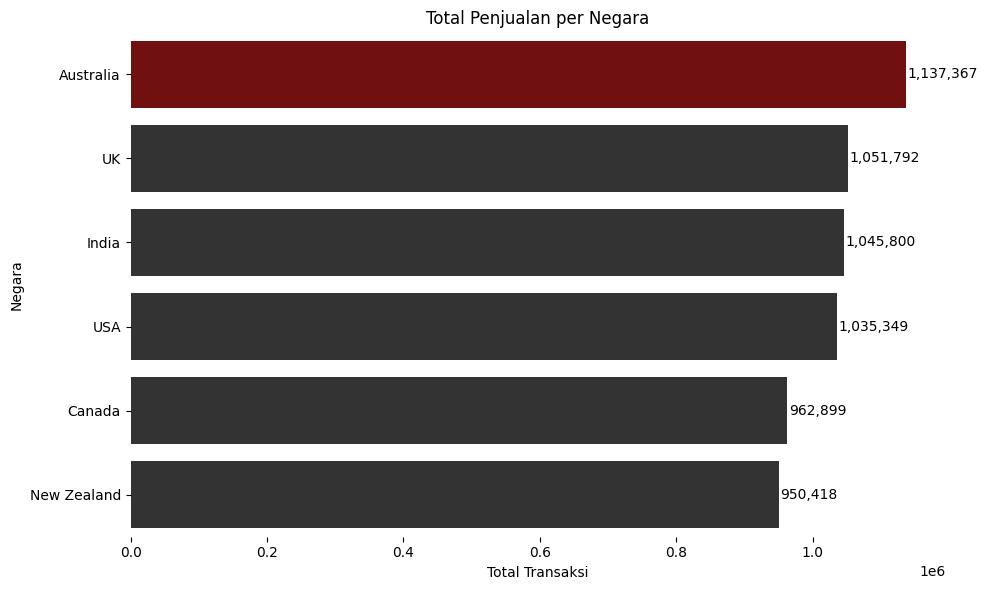

In [17]:
# Buat plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=top_country,
    y='Country',
    x='Amount',
    palette=['#800000'] + ['#333333'] * 5,
    ax=ax
)

# Tambahkan label
for i, value in enumerate(top_country['Amount']):
    ax.text(value + 2000, i, f'{int(value):,}', va='center')

# Hapus semua border
for spine in ax.spines.values():
    spine.set_visible(False)

# Tambahkan judul dan label
ax.set_title('Total Penjualan per Negara')
ax.set_xlabel('Total Transaksi')
ax.set_ylabel('Negara')

plt.tight_layout()
plt.show()

##### Insight dan Rekomendasi

Insight:

1. **Australia Menjadi Pasar Utama Perusahaan**
   - Dengan total penjualan mencapai **1,137,367**, Australia merupakan kontributor terbesar dalam keseluruhan pendapatan.
   - Menunjukkan stabilitas dan potensi tinggi untuk ekspansi lebih lanjut.

2. **Pasar Internasional Memiliki Distribusi Penjualan yang Merata**
   - UK, India, dan USA juga menunjukkan performa kuat dengan total penjualan di atas 1 juta.
   - Hal ini mencerminkan adanya pasar yang luas dan peluang untuk diversifikasi strategi penjualan lintas negara.

3. **New Zealand dan Canada Memiliki Potensi Tumbuh**
   - Meski berada di urutan bawah, **Canada (962,899)** dan **New Zealand (950,418)** tetap memiliki performa signifikan.
   - Keduanya dapat dioptimalkan untuk mendekati atau melampaui pasar besar lainnya melalui pendekatan yang tepat.

Rekomendasi:

- **Fokus Pertumbuhan dan Retensi di Australia**
  - Perkuat strategi *customer retention*, penambahan varian produk eksklusif, dan promosi lokal untuk mempertahankan dominasi di pasar Australia.
  - Perluas kerja sama dengan distributor dan retailer besar di wilayah ini.

- **Optimalkan Potensi Pasar UK, India, dan USA**
  - Gunakan pendekatan pemasaran lokal yang menyesuaikan dengan preferensi budaya dan tren konsumen di masing-masing negara.
  - Kembangkan kampanye yang lebih bertarget (misalnya: rasa populer di India vs. packaging premium di UK).

- **Dorong Pertumbuhan di Canada dan New Zealand**
  - Lakukan analisis segmentasi pelanggan untuk memahami hambatan pertumbuhan saat ini.
  - Luncurkan program promosi khusus, seperti *new customer acquisition campaign* atau *regional bundle deal*, untuk mendorong peningkatan pembelian.

- **Kelola Sumber Daya Sales Berdasarkan Potensi Negara**
  - Alokasikan tenaga penjual dan anggaran pemasaran secara proporsional dengan kontribusi dan potensi pasar.
  - Pertimbangkan penempatan sales top performer di negara-negara dengan potensi besar yang belum tergarap optimal.

#### b. Total Penjualan Produk per Negara

In [18]:
country_product = df.pivot_table(
    index='Country',
    columns='Product',
    values='Amount',
    aggfunc='sum',
    fill_value=0
)

country_product

Product,50% Dark Bites,70% Dark Bites,85% Dark Bars,99% Dark & Pure,After Nines,Almond Choco,Baker's Choco Chips,Caramel Stuffed Bars,Choco Coated Almonds,Drinking Coco,Eclairs,Fruit & Nut Bars,Manuka Honey Choco,Milk Bars,Mint Chip Choco,Orange Choco,Organic Choco Syrup,Peanut Butter Cubes,Raspberry Choco,Smooth Sliky Salty,Spicy Special Slims,White Choc
Country,,,,,,,,,,,,,,,,,,,,,,
Australia,89222.0,39354.0,38479.0,54908.0,27769.0,46879.0,58303.0,39949.0,37345.0,52199.0,64323.0,53088.0,45969.0,61173.0,50701.0,59717.0,60445.0,41055.0,52829.0,45269.0,61005.0,57386.0
Canada,45115.0,59024.0,37926.0,44198.0,41993.0,42028.0,36456.0,33376.0,57463.0,47964.0,24325.0,49924.0,50589.0,41727.0,15547.0,51156.0,36631.0,62181.0,12873.0,68257.0,58051.0,46095.0
India,64547.0,34713.0,56630.0,41923.0,58758.0,50820.0,27510.0,35427.0,27958.0,45892.0,79009.0,18368.0,18760.0,24206.0,69153.0,23219.0,68075.0,76909.0,39501.0,76041.0,75495.0,32886.0
New Zealand,35294.0,37226.0,67550.0,31773.0,55699.0,29211.0,45906.0,34013.0,20888.0,31157.0,60319.0,47124.0,49889.0,36855.0,86709.0,30758.0,53074.0,31374.0,32592.0,39004.0,36127.0,57876.0
UK,50092.0,20713.0,41447.0,79100.0,34524.0,59948.0,39018.0,51233.0,56091.0,41384.0,39277.0,42266.0,42602.0,57036.0,25536.0,42252.0,25284.0,79695.0,43421.0,75628.0,37562.0,67683.0
USA,57442.0,20580.0,57197.0,47894.0,42588.0,48650.0,42420.0,37590.0,41741.0,38059.0,45192.0,48377.0,67732.0,48251.0,36323.0,49042.0,51191.0,33628.0,83524.0,45493.0,25214.0,67221.0


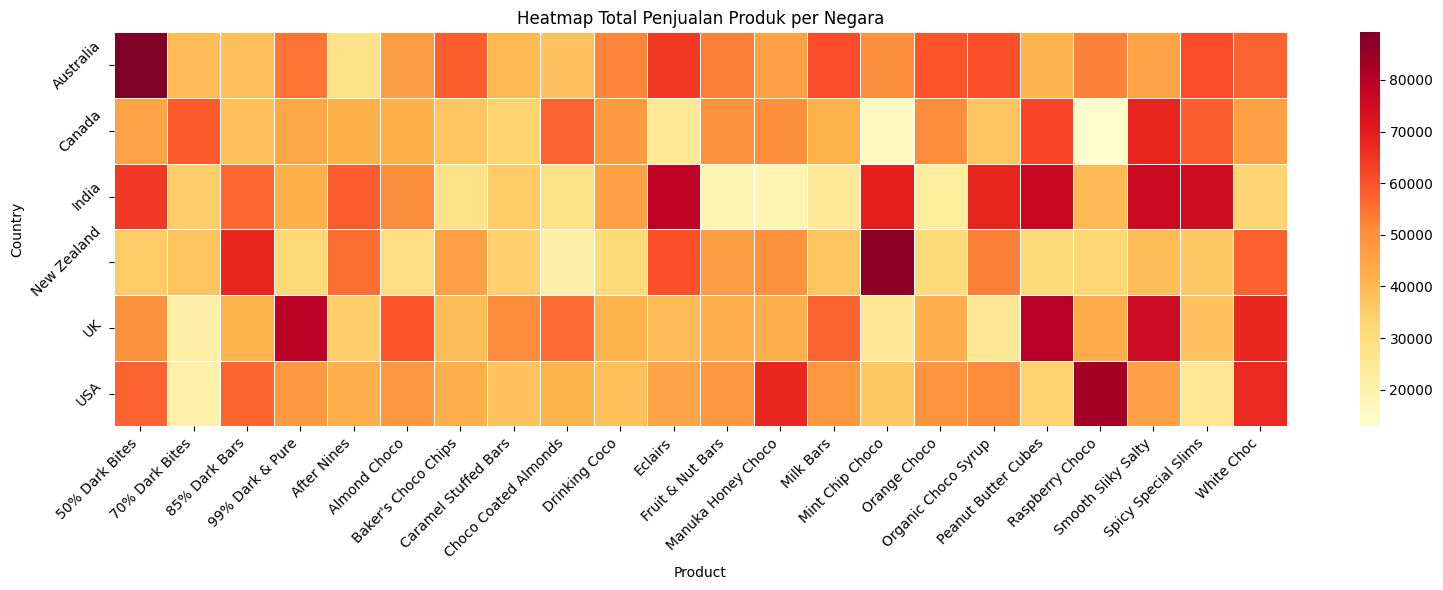

In [19]:
plt.figure(figsize=(16, 6))
sns.heatmap(country_product, cmap='YlOrRd', annot=False, linewidths=0.5)

plt.title('Heatmap Total Penjualan Produk per Negara')
plt.xlabel('Product')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Insight dan Rekomendasi

Insight:

1. **Australia Mendominasi Penjualan Produk Populer**
   - Produk seperti **50% Dark Bites** dan **Smooth Silky Salty** memiliki intensitas warna tertinggi di Australia, menandakan volume penjualan yang sangat besar.
   - Ini memperkuat posisi Australia sebagai pasar utama untuk produk unggulan.

2. **Preferensi Regional yang Berbeda**
   - **New Zealand** menunjukkan dominasi tinggi terhadap **Orange Choco**, berbeda dengan negara lain.
   - **India** memiliki penjualan tinggi untuk **Fruit & Nut Bars**, **Peanut Butter Cubes**, dan **Smooth Silky Salty** — menunjukkan preferensi pada varian rasa yang kaya dan padat isi.
   - **UK** sangat kuat dalam penjualan **99% Dark & Pure**, **Smooth Silky Salty**, dan **Raspberry Choco** yang mencerminkan preferensi terhadap cokelat intens.

3. **Distribusi Penjualan Relatif Merata di USA dan Canada**
   - USA dan Canada tidak menunjukkan dominasi ekstrem terhadap satu produk, namun cukup kuat di beberapa seperti **Milk Bars**, **Mint Chip Choco**, dan **White Choc**.
   - Hal ini mencerminkan pasar yang lebih **diversified** dalam preferensi rasa.

4. **Produk dengan Distribusi Stabil**
   - Produk seperti **Spicy Special Slims** dan **White Choc** memiliki performa lumayan konsisten di hampir semua negara, menunjukkan potensi sebagai produk *global favorite*.

Rekomendasi:

- **Kembangkan Strategi Spesifik per Negara**
  - Fokus promosi **Orange Choco** di New Zealand, **99% Dark & Pure** di UK, dan **Peanut Butter Cubes** di India berdasarkan preferensi lokal yang kuat.
  - Gunakan narasi lokal yang sesuai dengan selera dan gaya hidup konsumen masing-masing negara.

- **Tingkatkan Distribusi Produk Favorit Regional**
  - Pastikan produk unggulan di tiap negara tersedia secara luas, baik di modern trade, online, maupun distributor lokal.
  - Tambahkan stok pada area dengan demand tinggi berdasarkan data heatmap.

- **Kembangkan Produk Baru Berdasarkan Pola Preferensi**
  - Misalnya: Dark chocolate dengan varian ekstra (nuts, sea salt) untuk pasar UK dan India.
  - Varian fruity atau refreshing untuk pasar seperti Canada dan USA yang lebih menyebar dalam preferensi.

- **Gunakan Produk Serba Bisa sebagai Penetrasi Pasar Baru**
  - Produk seperti **White Choc** dan **Spicy Special Slims** bisa dijadikan ujung tombak untuk memperkenalkan merek ke pasar baru karena daya tariknya yang luas dan stabil.

### C. Tren Penjualan dari Waktu ke Waktu

#### a. Tren per Bulan

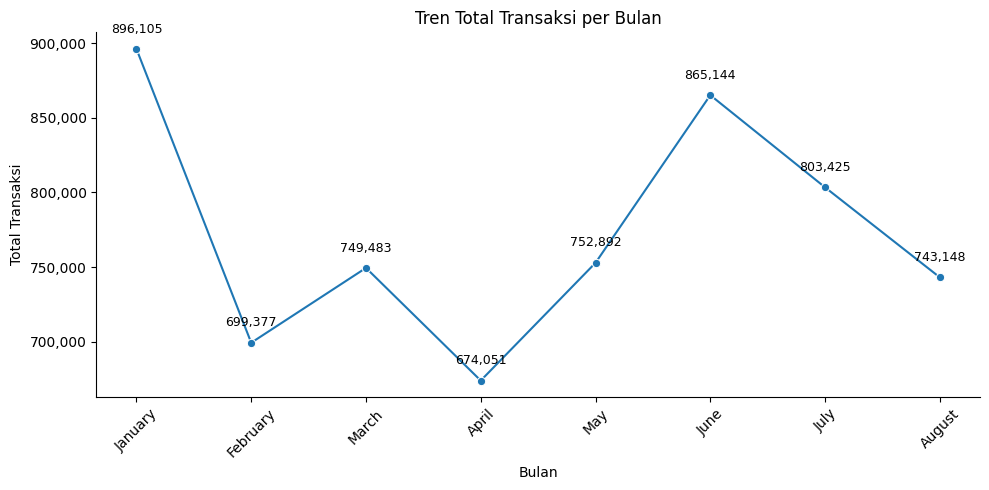

In [20]:
# urutkan nama bulan
urutan_bulan = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
df['Month_Name'] = pd.Categorical(df['Month_Name'], categories=urutan_bulan, ordered=True)

# Agregasi data
monthly_data = df.groupby('Month_Name')['Amount'].sum().reset_index()

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=monthly_data, x='Month_Name', y='Amount', marker='o', ax=ax)

# Format
ax.set_title("Tren Total Transaksi per Bulan")
ax.set_xlabel("Bulan")
ax.set_ylabel("Total Transaksi")
ax.set_xticklabels(urutan_bulan, rotation=45)

# Tambahkan angka di atas titik
offset = monthly_data['Amount'].max() * 0.01
for i, value in enumerate(monthly_data['Amount']):
    ax.text(i, value + offset, f'{int(value):,}', ha='center', va='bottom', fontsize=9)

# Hilangkan grid dan border kanan & atas
ax.grid(False)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Format angka sumbu Y
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


##### Insight dan Rekomendasi

Insight:

1. **Puncak Transaksi Terjadi di Bulan Januari dan Juni**
   - Januari mencatat total transaksi tertinggi dengan **896.105 transaksi**, disusul Juni dengan **865.144 transaksi**.
   - Hal ini kemungkinan terkait momentum belanja pasca liburan akhir tahun dan pertengahan tahun (mid-year sale).

2. **Penurunan Signifikan di Bulan Februari dan April**
   - Februari mengalami penurunan drastis hingga **699.377 transaksi**, kemungkinan akibat efek pasca promo besar atau aktivitas belanja yang melambat.
   - April mencatat titik terendah yaitu **674.051 transaksi**, mungkin berkaitan dengan periode libur panjang yang memengaruhi perilaku belanja.

3. **Stabilitas Terlihat pada Bulan Mei hingga Agustus**
   - Meskipun ada sedikit penurunan dari Juni ke Juli dan Agustus, volume transaksi tetap relatif tinggi dan stabil di atas **740.000**.

Rekomendasi:

- **Optimalkan Kampanye Promosi di Awal dan Pertengahan Tahun**
  - Fokuskan anggaran promosi, iklan, dan bundling produk di **Januari** dan **Juni** untuk memaksimalkan volume transaksi.
  - Gunakan strategi *retargeting* untuk mempertahankan pelanggan dari periode tersebut.

- **Tingkatkan Aktivitas Marketing di Bulan Lesu**
  - Khususnya di **Februari** dan **April**, lakukan campaign seperti flash sale, promo musiman, atau kolaborasi brand untuk menaikkan engagement dan transaksi.

- **Bangun Antisipasi untuk Momen Mid-Year**
  - Persiapkan strategi *mid-year campaign* menjelang Juni agar lonjakan transaksi dapat dimaksimalkan dengan ketersediaan stok dan infrastruktur logistik yang siap.

- **Analisis Faktor Eksternal**
  - Lakukan eksplorasi data lebih dalam untuk memahami apakah penurunan pada bulan tertentu dipengaruhi faktor eksternal seperti hari libur nasional, musim liburan sekolah, atau tren ekonomi.

#### b. Tren per Hari

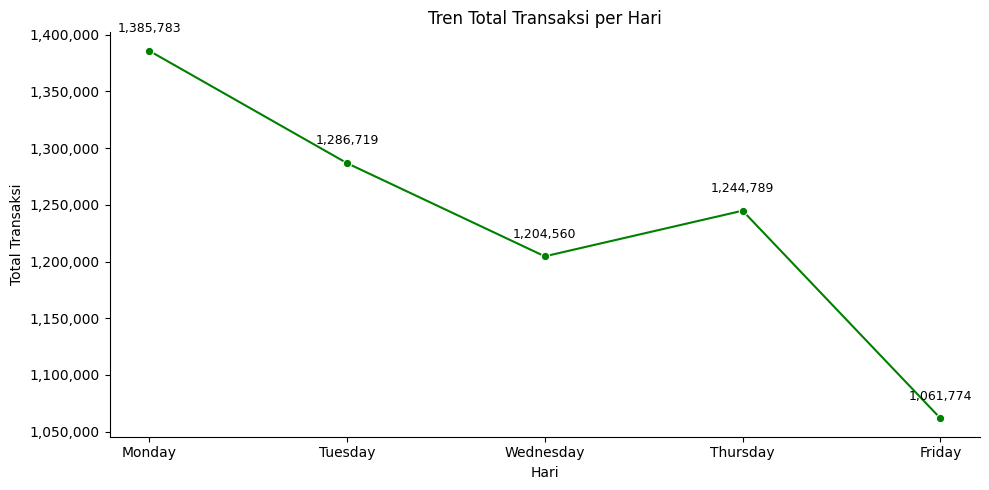

In [21]:
# Urutkan nama hari
urutan_hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df['Day_Name'] = pd.Categorical(df['Day_Name'], categories=urutan_hari, ordered=True)

# Agregasi data
daily_data = df.groupby('Day_Name')['Amount'].sum().reset_index()

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=daily_data, x='Day_Name', y='Amount', marker='o', color='green', ax=ax)

# Judul dan label
ax.set_title("Tren Total Transaksi per Hari")
ax.set_xlabel("Hari")
ax.set_ylabel("Total Transaksi")

# Tambahkan angka di atas titik
offset = daily_data['Amount'].max() * 0.01  # penyesuaian posisi teks
for i, value in enumerate(daily_data['Amount']):
    ax.text(i, value + offset, f'{int(value):,}', ha='center', va='bottom', fontsize=9)

# Format sumbu Y agar ribuan/milion lebih jelas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Hilangkan grid dan spines atas & kanan
ax.grid(False)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Tata letak
plt.tight_layout()
plt.show()

##### Insight dan Rekomendasi

Insight:

1. **Puncak Aktivitas Terjadi di Hari Senin**
   - Hari Senin mencatat total transaksi tertinggi sebanyak **1.385.783 transaksi**.
   - Hal ini mengindikasikan bahwa banyak konsumen memulai minggu dengan melakukan pembelian, mungkin karena kebutuhan mingguan atau efek akhir pekan.

2. **Penurunan Bertahap dari Selasa hingga Jumat**
   - Terjadi penurunan konsisten dari **Selasa (1.286.719)** ke **Rabu (1.204.560)**.
   - Meski Kamis sedikit naik ke **1.244.789**, tren kembali turun drastis di **Jumat (1.061.774)** — angka terendah dalam seminggu.

Rekomendasi:

- **Fokuskan Promosi di Awal Minggu**
  - Maksimalkan kampanye marketing di **Senin dan Selasa**, dengan diskon eksklusif, newsletter, dan push notification.
  - Senin bisa dimanfaatkan sebagai momentum “Start Your Week” promo.

- **Bangkitkan Aktivitas di Hari Jumat**
  - Luncurkan promo bertema “**Friday Flash Sale**” atau “**TGIF Deals**” untuk meningkatkan minat transaksi menjelang akhir pekan.

- **Optimalkan Konten dan Iklan pada Hari Rendah**
  - Buat konten engaging dan edukatif yang bisa menarik perhatian di hari **Rabu dan Jumat**, karena engagement relatif lebih rendah.

- **Evaluasi Pola Konsumen**
  - Lakukan segmentasi lebih lanjut berdasarkan waktu dan demografi untuk memahami kenapa hari Jumat memiliki penurunan signifikan.

### D. Analisis Kinerja Penjual

#### a. Penjual Terbaik

In [22]:
best_sales = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).reset_index().head()
best_sales

,Sales Person,Amount
0,Ches Bonnell,320901.0
1,Oby Sorrel,316645.0
2,Madelene Upcott,316099.0
3,Brien Boise,312816.0
4,Kelci Walkden,311710.0


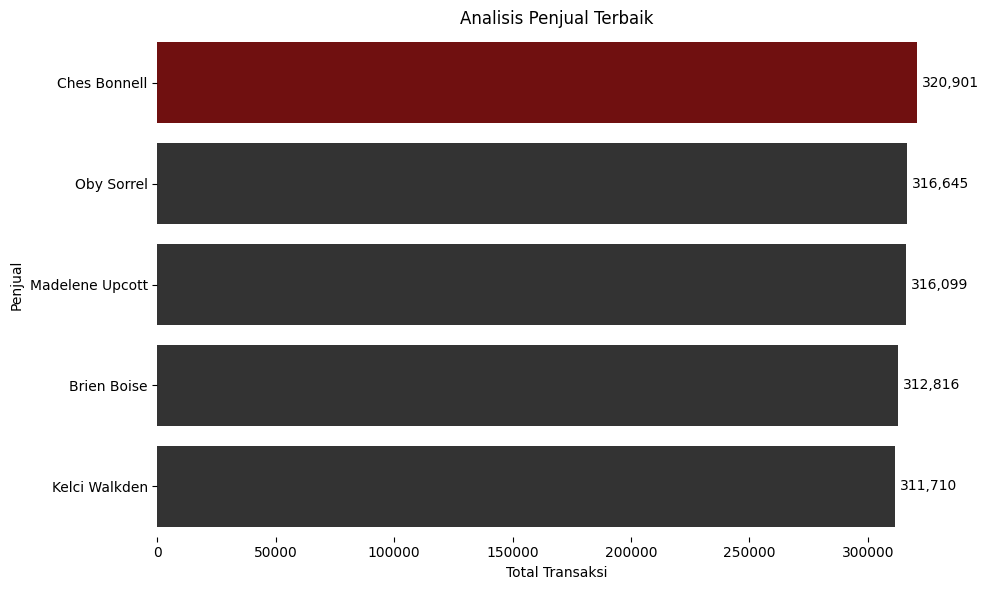

In [23]:
# Buat plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=best_sales.head(5),
    y='Sales Person',
    x='Amount',
    palette=['#800000'] + ['#333333'] * 4,
    ax=ax
)

# Tambahkan label
for i, value in enumerate(best_sales['Amount'].head(5)):
    ax.text(value + 2000, i, f'{int(value):,}', va='center')

# Hapus semua border
for spine in ax.spines.values():
    spine.set_visible(False)

# Tambahkan judul dan label
ax.set_title('Analisis Penjual Terbaik')
ax.set_xlabel('Total Transaksi')
ax.set_ylabel('Penjual')

plt.tight_layout()
plt.show()

##### Ches Bonnell

In [24]:
df_cb = df[df["Sales Person"] == "Ches Bonnell"]

In [25]:
df_cb_country = df_cb.groupby('Country')['Amount'].sum().sort_values(ascending=False).reset_index()
df_cb_country

,Country,Amount
0,India,98763.0
1,UK,51772.0
2,New Zealand,47600.0
3,Australia,45871.0
4,Canada,40656.0
5,USA,36239.0


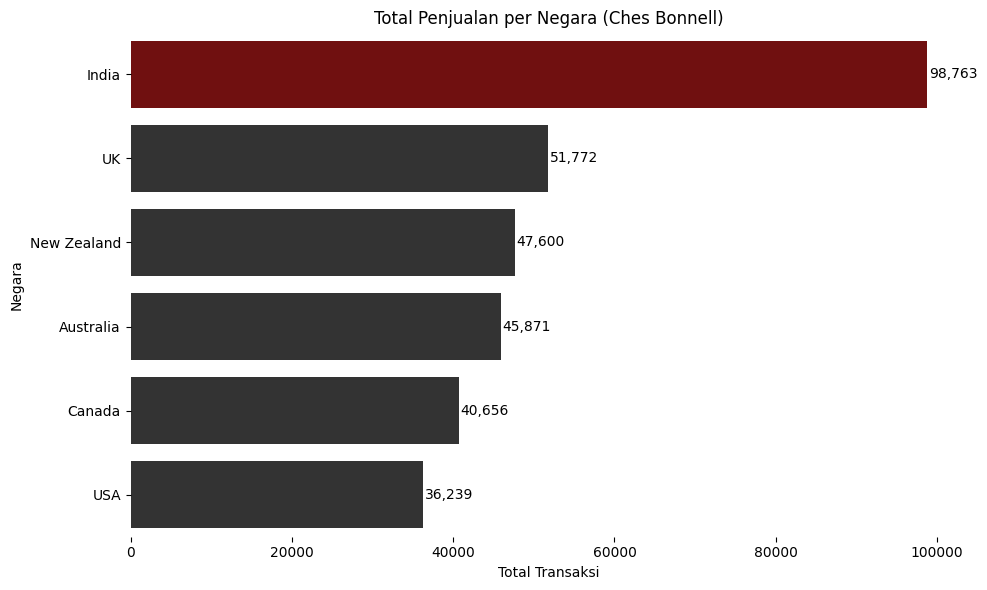

In [26]:
# Buat plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=df_cb_country,
    y='Country',
    x='Amount',
    palette=['#800000'] + ['#333333'] * 5,
    ax=ax
)

# Tambahkan label
for i, value in enumerate(df_cb_country['Amount']):
    ax.text(value + 200, i, f'{int(value):,}', va='center')

# Hapus semua border
for spine in ax.spines.values():
    spine.set_visible(False)

# Tambahkan judul dan label
ax.set_title('Total Penjualan per Negara (Ches Bonnell)')
ax.set_xlabel('Total Transaksi')
ax.set_ylabel('Negara')

plt.tight_layout()
plt.show()

In [27]:
df_cb_product = df_cb.groupby('Product')['Amount'].sum().sort_values(ascending=False).reset_index().head(10)
df_cb_product

,Product,Amount
0,Choco Coated Almonds,42854.0
1,Peanut Butter Cubes,35294.0
2,Organic Choco Syrup,32487.0
3,Smooth Sliky Salty,31066.0
4,Caramel Stuffed Bars,26110.0
5,Mint Chip Choco,21406.0
6,Spicy Special Slims,19789.0
7,Orange Choco,17171.0
8,85% Dark Bars,14924.0
9,Almond Choco,11788.0


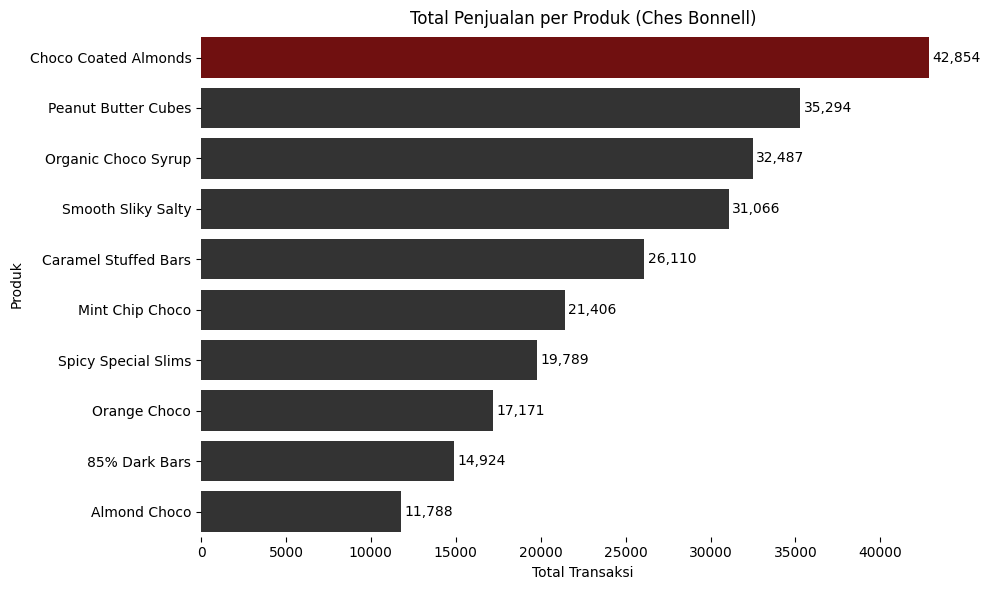

In [28]:
# Buat plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=df_cb_product,
    y='Product',
    x='Amount',
    palette=['#800000'] + ['#333333'] * 9,
    ax=ax
)

# Tambahkan label
for i, value in enumerate(df_cb_product['Amount']):
    ax.text(value + 200, i, f'{int(value):,}', va='center')

# Hapus semua border
for spine in ax.spines.values():
    spine.set_visible(False)

# Tambahkan judul dan label
ax.set_title('Total Penjualan per Produk (Ches Bonnell)')
ax.set_xlabel('Total Transaksi')
ax.set_ylabel('Produk')

plt.tight_layout()
plt.show()

###### Insight dan Rekomendasi

Insight:

- Ches Bonnell belum sepenuhnya mengoptimalkan potensi pasar Australia, padahal negara tersebut mencatatkan total penjualan tertinggi secara keseluruhan.
- Ches Bonnell menunjukkan kapabilitas dalam menjual produk yang kurang diminati oleh sales lain, mengindikasikan kekuatan dalam personal selling dan kepekaan dalam mengidentifikasi peluang pasar.

Rekomendasi:

- Tingkatkan kontribusi Ches Bonnell di pasar Australia melalui penyediaan data pelanggan yang lebih komprehensif serta dukungan kampanye pemasaran yang terfokus.
- Libatkan Ches Bonnell dalam program pelatihan sales sebagai contoh praktik terbaik dalam strategi penjualan dan pendekatan pelanggan.
- Libatkan Ches Bonnell dalam proses perumusan strategi pemasaran, khususnya untuk produk dengan performa penjualan rendah, guna memanfaatkan keahliannya dalam meningkatkan daya tarik pasar.

#### b. Penjual Terburuk

In [29]:
worst_sales = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=True).reset_index().head()
worst_sales

,Sales Person,Amount
0,Wilone O'Kielt,138523.0
1,Dotty Strutley,190624.0
2,Camilla Castle,196616.0
3,Mallorie Waber,200592.0
4,Andria Kimpton,201747.0


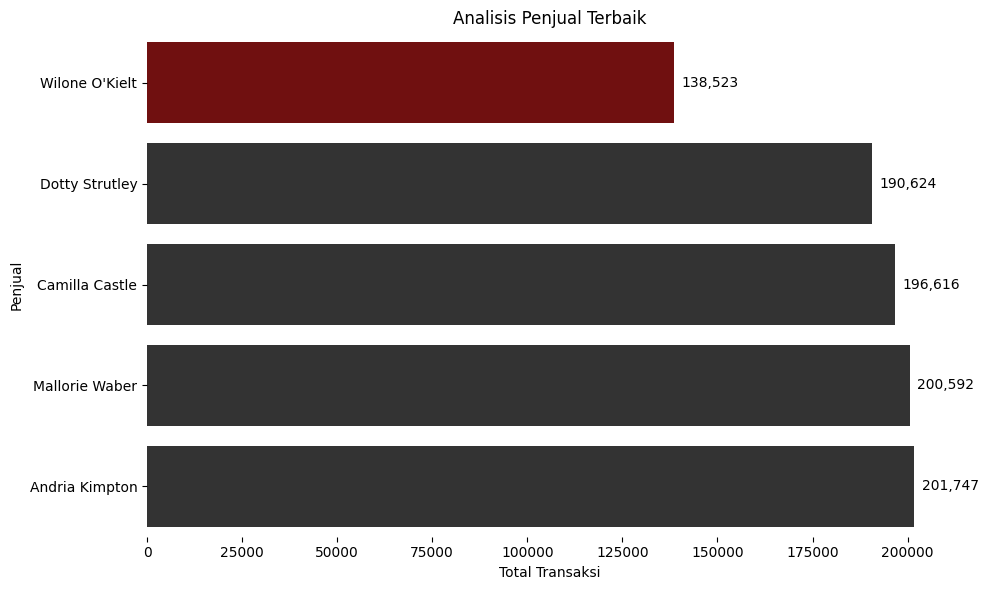

In [30]:
# Buat plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=worst_sales.head(5),
    y='Sales Person',
    x='Amount',
    palette=['#800000'] + ['#333333'] * 4,
    ax=ax
)

# Tambahkan label
for i, value in enumerate(worst_sales['Amount'].head(5)):
    ax.text(value + 2000, i, f'{int(value):,}', va='center')

# Hapus semua border
for spine in ax.spines.values():
    spine.set_visible(False)

# Tambahkan judul dan label
ax.set_title('Analisis Penjual Terbaik')
ax.set_xlabel('Total Transaksi')
ax.set_ylabel('Penjual')

plt.tight_layout()
plt.show()

##### Wilone O'Kielt

In [31]:
df_wok = df[df["Sales Person"] == "Wilone O'Kielt"]

In [32]:
df_wok_country = df_wok.groupby('Country')['Amount'].sum().sort_values(ascending=False).reset_index()
df_wok_country

,Country,Amount
0,New Zealand,42000.0
1,USA,27937.0
2,Australia,27615.0
3,India,23996.0
4,UK,8547.0
5,Canada,8428.0


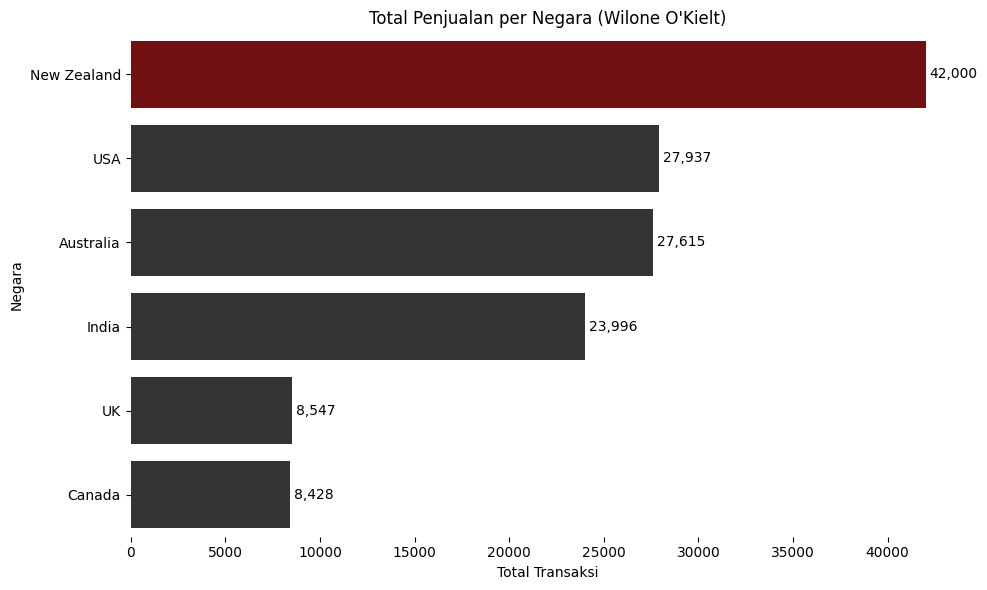

In [33]:
# Buat plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=df_wok_country,
    y='Country',
    x='Amount',
    palette=['#800000'] + ['#333333'] * 5,
    ax=ax
)

# Tambahkan label
for i, value in enumerate(df_wok_country['Amount']):
    ax.text(value + 200, i, f'{int(value):,}', va='center')

# Hapus semua border
for spine in ax.spines.values():
    spine.set_visible(False)

# Tambahkan judul dan label
ax.set_title("Total Penjualan per Negara (Wilone O'Kielt)")
ax.set_xlabel('Total Transaksi')
ax.set_ylabel('Negara')

plt.tight_layout()
plt.show()

In [34]:
df_wok_product = df_wok.groupby('Product')['Amount'].sum().sort_values(ascending=False).reset_index().head(10)
df_wok_product

,Product,Amount
0,After Nines,15743.0
1,50% Dark Bites,14532.0
2,Mint Chip Choco,12971.0
3,Choco Coated Almonds,12390.0
4,Fruit & Nut Bars,10255.0
5,Almond Choco,9198.0
6,Organic Choco Syrup,8617.0
7,Manuka Honey Choco,8008.0
8,Smooth Sliky Salty,7721.0
9,Orange Choco,7042.0


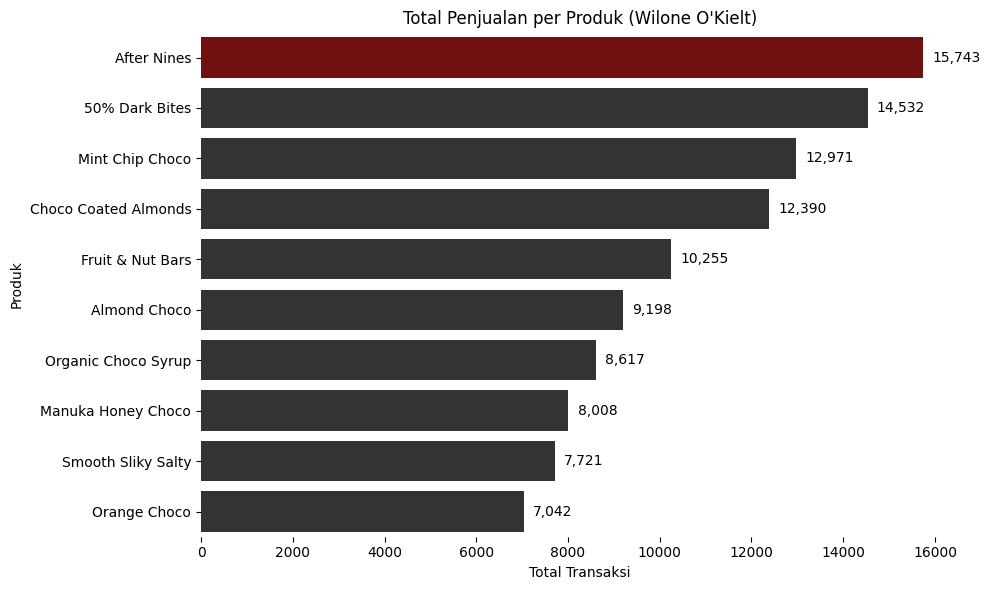

In [35]:
# Buat plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=df_wok_product,
    y='Product',
    x='Amount',
    palette=['#800000'] + ['#333333'] * 9,
    ax=ax
)

# Tambahkan label
for i, value in enumerate(df_wok_product['Amount']):
    ax.text(value + 200, i, f'{int(value):,}', va='center')

# Hapus semua border
for spine in ax.spines.values():
    spine.set_visible(False)

# Tambahkan judul dan label
ax.set_title("Total Penjualan per Produk (Wilone O'Kielt)")
ax.set_xlabel('Total Transaksi')
ax.set_ylabel('Produk')

plt.tight_layout()
plt.show()

###### Insight dan Rekomendasi

Insight:

- Wilone O'Kielt belum mampu mengindentifikasi dan mengjangkau pasar-pasar kunci seperti Australia, UK dan India.
- Wilone O'Kielt menunjukkan keterbatasan dalam memahami produk dengan permintaan tinggi (high-demand products).
- Strategi penjualan yang diterapkan Wilone O'Kielt belum efektif dalam memasarkan produk dengan performa tinggi (high-performing products).

Rekomandasi:

- Fasilitasi ekspansi Wilone O'Kielt ke wilayah prioritas (Australia, UK, India) dengan memberikan akses ke data pelanggan dan prospek potensial.
- Selenggarakan pelatihan intensif yang berfokus pada pemahaman produk unggulan serta perilaku pasar terhadap produk tersebut.
- Rancang strategi promosi terpadu, seperti program bundling atau diskon terarah, untuk meningkatkan daya tarik produk high-performing dalam portofolio Wilone O'Kielt.
- Wajibkan partisipasi Wilone dalam sesi pembelajaran bersama top performer (Ches Bonnell) sebagai bagian dari program peningkatan kapabilitas sales.
- Lakukan evaluasi menyeluruh terhadap pendekatan pemasaran Wilone untuk mengidentifikasi dan memperbaiki titik-titik kelemahan dalam strategi yang sedang dijalankan.